## Eleven Cities Skating Tour

The datafile contains the average temperature over the coldest period of 15 days. The ringed data points are the years that a skating tour was held. 

Demonstration: 
1. Linear Model
2. Parameter fit
3. Evidence to find the best model.
4. Confidence region for the fit

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from astropy.io import ascii
from BayesicFitting import PolynomialModel
from BayesicFitting import ExpModel
from BayesicFitting import SplinesModel

from BayesicFitting import Fitter
from BayesicFitting import LevenbergMarquardtFitter
from BayesicFitting import AmoebaFitter
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit

import matplotlib.pyplot as plt


Read the data. We rescale the data to get "nice" numbers, i.e. the year in year-since-2000.


In [2]:
tbl = ascii.read( "data/ElfStedenIJs.csv" )
year = tbl['col1'].data
temp = tbl['col2'].data
tour = tbl['col4'].data
year -= 2000
#print( temp )
#print( tour )


Define the model

In [3]:
mdl = PolynomialModel( 0 )
print( mdl )


Polynomial: f( x:p ) = p_0


define the fitter: Fitter

In [4]:
fitter = Fitter( year, mdl )
 
# find the parameters
param = fitter.fit( temp )
  

In [5]:
print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-10,10], noiseLimits=[0.01,10] ) ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

Parameters :    -1.954
StDevs     :     0.255
Scale      :     2.720
Evidence   :  -123.637
Covar matrix :
    0.065


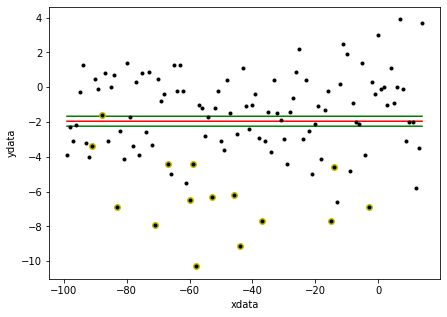

In [6]:
plotFit( year, data=temp, model=mdl, fitter=fitter, show=False )
plt.plot( year, tour, 'yo')
plt.plot( year, temp, 'k.')
plt.show()


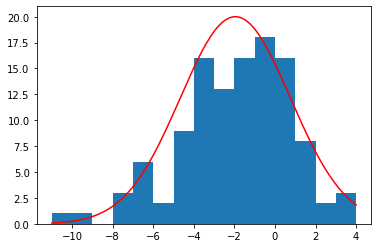

In [7]:
x = numpy.linspace( -11, 4, 141, dtype=float )
plt.hist( temp, 15, (-11,4))
xp = ( x - param[0] ) / fitter.scale
y = numpy.exp( -0.5 * xp * xp )
y *= 20 / numpy.max( y )
plt.plot( x, y, 'r-' )
plt.show()

Try a constant and an exponential.

Parameters : [   -2.295    0.946    0.050]
StDevs     : [    0.440    0.761    0.062]
Scale      :     2.703
Evidence   :  -126.207
Covar matrix :
[[    0.194   -0.269    0.019]
 [   -0.269    0.579   -0.035]
 [    0.019   -0.035    0.004]]


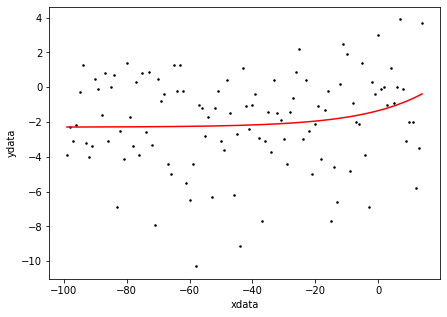

In [8]:
mdl = PolynomialModel( 0 )
mdl += ExpModel()
mdl.parameters = [-2.0, 1.0, 1.0]

fitter = AmoebaFitter( year, mdl )
param = fitter.fit( temp )

print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-10,10], noiseLimits=[0.01,10] ) ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

plotFit( year, data=temp, model=mdl )


The logEvidence went down. It is not better that a constant.


Parameters : [   -1.571    0.009]
StDevs     : [    0.415    0.008]
Scale      :     2.716
Evidence   :  -126.356
Covar matrix :
[[    0.173    0.003]
 [    0.003    0.000]]


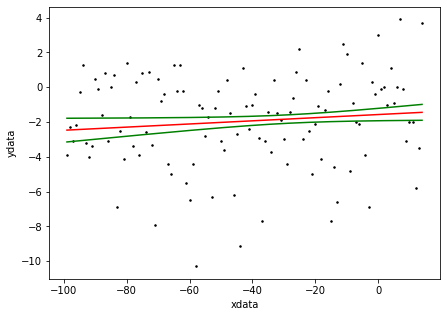

In [9]:
mdl = PolynomialModel( 1 )

fitter = Fitter( year, mdl )
param = fitter.fit( temp )

print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-10,10], noiseLimits=[0.01,10] ) ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

plotFit( year, data=temp, model=mdl, fitter=fitter )

The logEvidence has gone down; this model is not better either.

It seems that a constant model is the best model for this dataset. Mostly this is due to the large scale of the noise.